In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
from scipy.stats import ttest_ind

sudoku_data = np.genfromtxt("datasets/minmax_rowcolumn_6by6.txt",delimiter=',',names=True)
data_p = pd.read_csv('datasets/minmax_rowcolumn_6by6.txt',sep =',')

Populating the interactive namespace from numpy and matplotlib


In [66]:
data_p.corr()

,givens,min,max,visits,propagations,conflicts,avg_level,seconds,assignments,restarts,min_row_col,max_row_col
givens,1.000000,0.469905,0.356126,-0.526090,-0.518801,-0.522695,-0.283499,-0.543414,-0.518805,NaN,0.201741,0.470238
min,0.469905,1.000000,0.093862,-0.266866,-0.256409,-0.269364,-0.099008,-0.274711,-0.256413,NaN,0.074159,0.269831
max,0.356126,0.093862,1.000000,-0.134224,-0.127044,-0.133619,-0.044828,-0.132978,-0.127047,NaN,0.104654,0.179558
visits,-0.526090,-0.266866,-0.134224,1.000000,0.970374,0.963470,0.512934,0.973572,0.970383,NaN,-0.125635,-0.256087
propagations,-0.518801,-0.256409,-0.127044,0.970374,1.000000,0.973347,0.668699,0.967597,1.000000,NaN,-0.126749,-0.248376
conflicts,-0.522695,-0.269364,-0.133619,0.963470,0.973347,1.000000,0.592010,0.961521,0.973360,NaN,-0.128407,-0.246083
avg_level,-0.283499,-0.099008,-0.044828,0.512934,0.668699,0.592010,1.000000,0.561878,0.668681,NaN,-0.060479,-0.147935
seconds,-0.543414,-0.274711,-0.132978,0.973572,0.967597,0.961521,0.561878,1.000000,0.967603,NaN,-0.127199,-0.260331
assignments,-0.518805,-0.256413,-0.127047,0.970383,1.000000,0.973360,0.668681,0.967603,1.000000,NaN,-0.126750,-0.248376
restarts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data_p.sort_values(['visits']).head(1240).corr()

,givens,min,max,visits,propagations,conflicts,avg_level,seconds,assignments,restarts,min_row_col,max_row_col
givens,1.000000,0.473972,0.371731,-0.945339,NaN,NaN,NaN,-0.030449,NaN,NaN,0.178853,0.476020
min,0.473972,1.000000,0.108993,-0.461165,NaN,NaN,NaN,-0.026342,NaN,NaN,0.066709,0.268323
max,0.371731,0.108993,1.000000,-0.329336,NaN,NaN,NaN,-0.035527,NaN,NaN,0.065657,0.183981
visits,-0.945339,-0.461165,-0.329336,1.000000,NaN,NaN,NaN,0.013491,NaN,NaN,-0.170759,-0.454985
propagations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conflicts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seconds,-0.030449,-0.026342,-0.035527,0.013491,NaN,NaN,NaN,1.000000,NaN,NaN,-0.007249,0.037355
assignments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restarts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


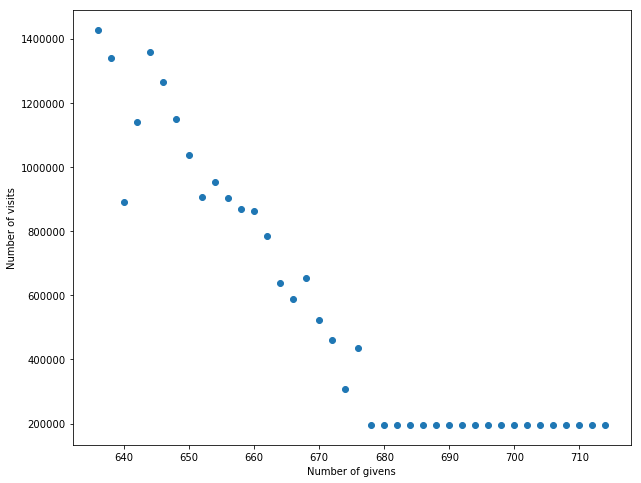

In [110]:
means = data_p.groupby('givens')['visits'].mean()
means_df = pd.DataFrame({'givens':means.index, 'visits':means.values})
plt.scatter(means_df['givens'],means_df['visits'])
plt.xlabel('Number of givens')
plt.ylabel('Number of visits')
plt.show()

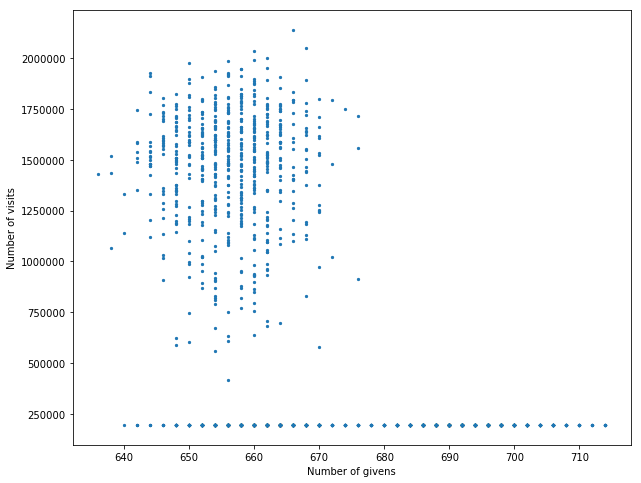

In [13]:
# givens = np.sort(sudoku_data ,order=["givens","visits"])
givens =sudoku_data 
plt.scatter(givens['givens'],givens['visits'],s=5)
plt.xlabel('Number of givens')
plt.ylabel('Number of visits')
plt.savefig("6x6_givens_visits.png")
plt.show()

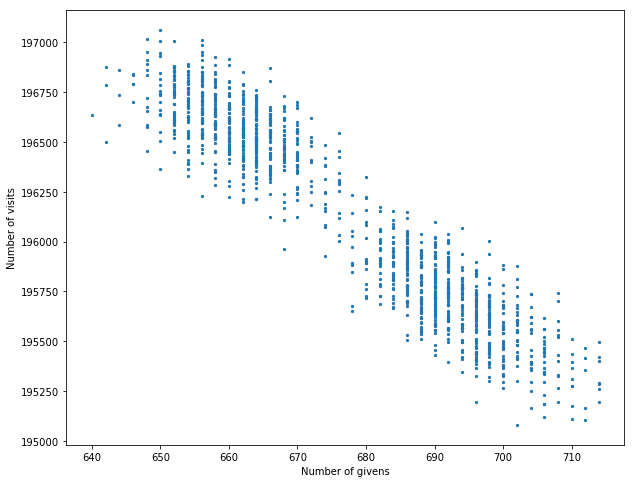

In [14]:
givens = np.sort(sudoku_data ,order=["visits"])[:1240,]
plt.scatter(givens['givens'],givens['visits'],s=5)
plt.xlabel('Number of givens')
plt.ylabel('Number of visits')
plt.savefig("6x6_givens_visits_low.png")
plt.show()

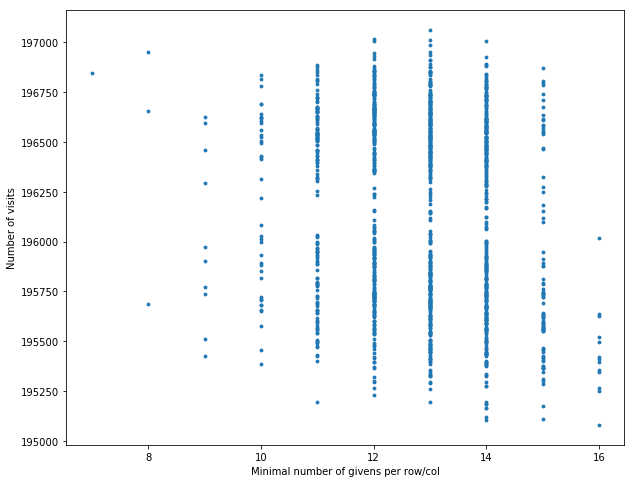

In [31]:
sorted_sudoku = np.sort(sudoku_data ,order=["visits"])[:1240,]
plt.scatter(sorted_sudoku['min_row_col'],sorted_sudoku['visits'],s=8)
plt.xlabel('Minimal number of givens per row/col')
plt.ylabel('Number of visits')
plt.savefig("6x6_givens_visits_low.png")
plt.show()

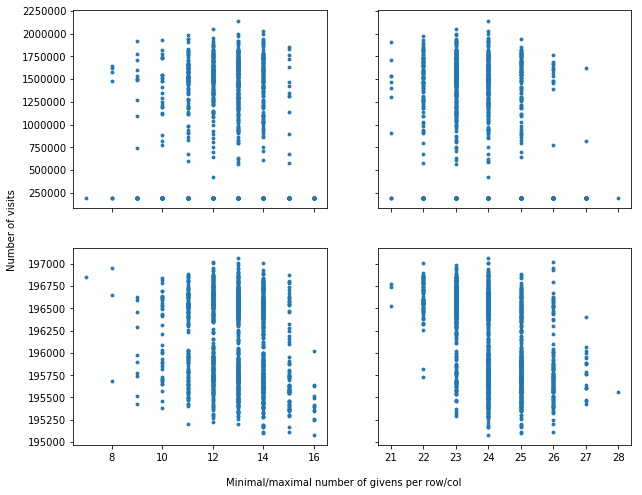

In [104]:
left_data = np.sort(sudoku_data ,order=["visits"])[1240:,]
middle_data = np.sort(sudoku_data ,order=["visits"])[:1240,]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ax1.scatter(sudoku_data['min_row_col'],sudoku_data['visits'],s=8)
ax2.scatter(sudoku_data['max_row_col'],sudoku_data['visits'],s=8)

ax3.scatter(middle_data['min_row_col'],middle_data['visits'],s=8)
ax4.scatter(middle_data['max_row_col'],middle_data['visits'],s=8)

# Set common labels
fig.text(0.5, 0.06, 'Minimal/maximal number of givens per row/col', ha='center', va='center')
fig.text(0.04, 0.5, 'Number of visits', ha='center', va='center', rotation='vertical')
plt.savefig("6x6_givens_max_min.png",dpi=300)
plt.show()

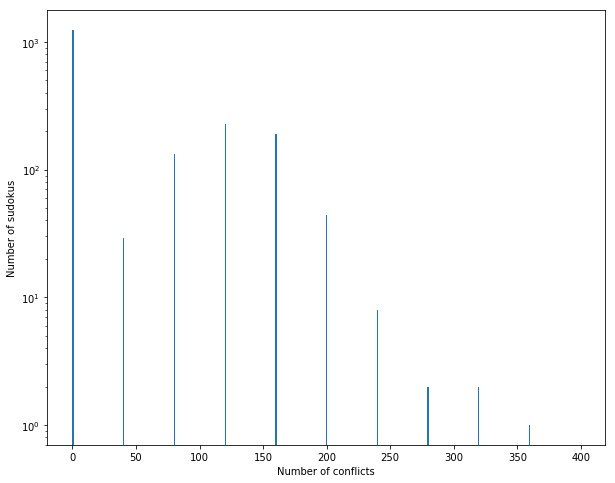

In [109]:
conflicts = sudoku_data
plt.hist(conflicts['conflicts'], width=1)
plt.yscale('log')
plt.xlabel('Number of conflicts')
plt.ylabel('Number of sudokus')
plt.savefig("6x6_conflicts.png")
plt.show()

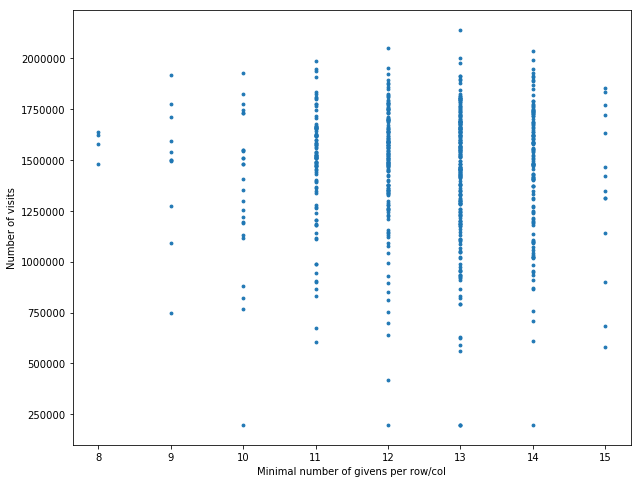

In [32]:
sorted_sudoku = np.sort(sudoku_data ,order=["visits"])[1240:,]
plt.scatter(sorted_sudoku['min_row_col'],sorted_sudoku['visits'],s=8)
plt.xlabel('Minimal number of givens per row/col')
plt.ylabel('Number of visits')
plt.savefig("6x6_givens_visits_low.png")
plt.show()

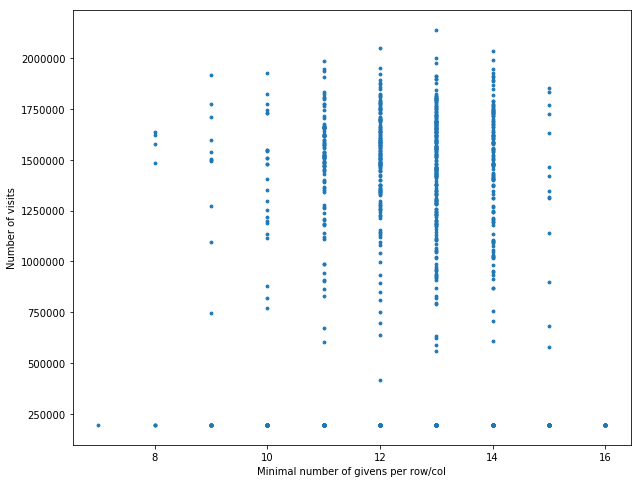

In [33]:
sorted_sudoku = np.sort(sudoku_data ,order=["visits"])
plt.scatter(sorted_sudoku['min_row_col'],sorted_sudoku['visits'],s=8)
plt.xlabel('Minimal number of givens per row/col')
plt.ylabel('Number of visits')
plt.savefig("6x6_givens_visits_low.png")
plt.show()